# Removing Unevenly Bright Background in an Image

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import equalize_adapthist
import numpy as np

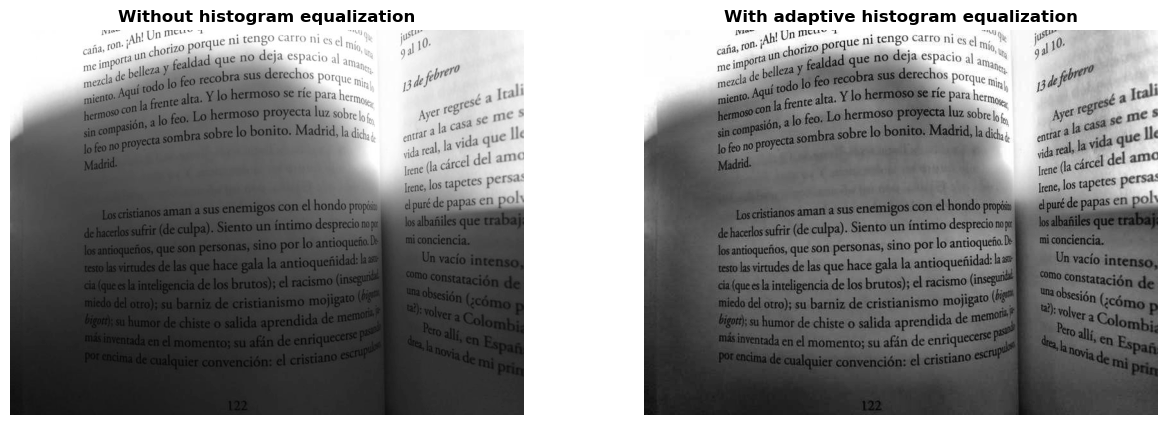

In [2]:
book = cv2.imread("./images/book.jpg", cv2.IMREAD_GRAYSCALE)
book_adaptive = equalize_adapthist(book)
book_adaptive = book_adaptive / book_adaptive.max() * 255

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Without histogram equalization")
axs[0].axis("off")
axs[1].imshow(book_adaptive, cmap='gray', vmin=0, vmax=255) 
axs[1].set_title("With adaptive histogram equalization")
axs[1].axis("off")
plt.show()

When the background is bright, we need to even out variation in bright intensities. We can use Black-hat transform to subtract the image from its bright background.  

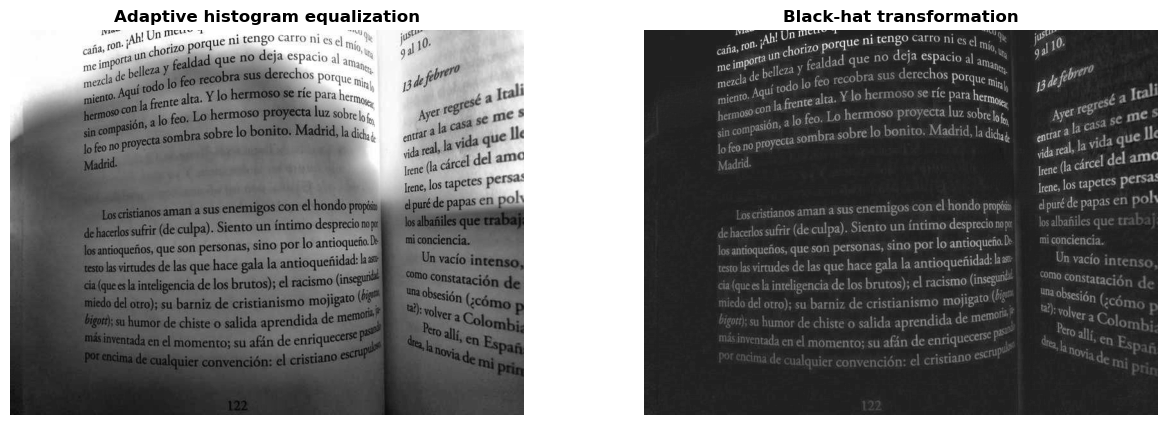

In [3]:
neighborhood = np.ones((10, 10))
book_adaptive_BlackHat = cv2.morphologyEx(book_adaptive, cv2.MORPH_BLACKHAT, neighborhood) # https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f
book_adaptive_BlackHat = (book_adaptive_BlackHat - book_adaptive_BlackHat.min()) / (book_adaptive_BlackHat.max() - book_adaptive_BlackHat.min()) * 255

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book_adaptive, cmap='gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[0].set_title("Adaptive histogram equalization")
axs[1].imshow(book_adaptive_BlackHat, cmap='gray', vmin=0, vmax=255)
axs[1].axis('off')
axs[1].set_title('Black-hat transformation')
plt.show()

Invert a grayscale image.

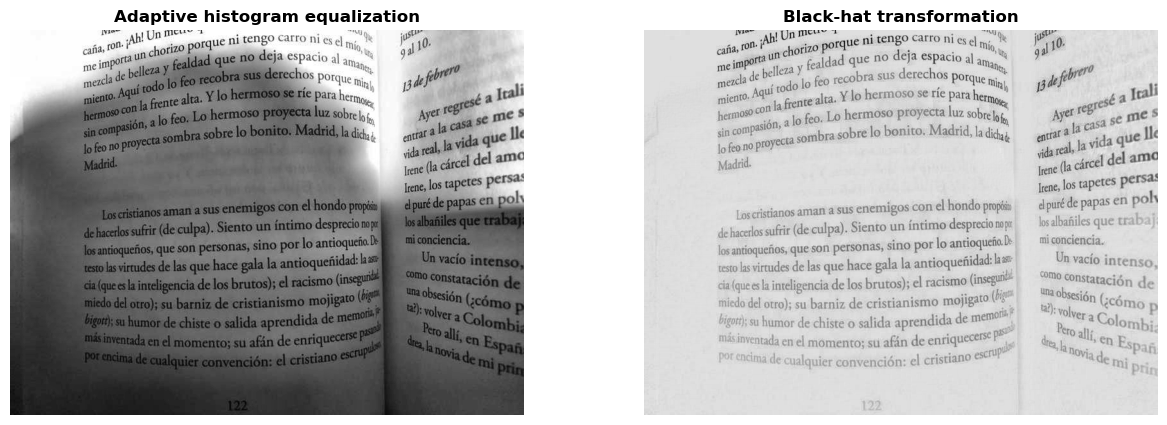

In [4]:
book_adaptive_BlackHat = 255 - np.uint8(book_adaptive_BlackHat)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(book_adaptive, cmap='gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[0].set_title("Adaptive histogram equalization")
axs[1].imshow(book_adaptive_BlackHat, cmap='gray', vmin=0, vmax=255)
axs[1].axis('off')
axs[1].set_title('Black-hat transformation')
plt.show()